NIVASHINI J

PANDAS TIME SERIES ANALYSIS  USING AMAZON STOCK DATA



        objectives-

            set index,

            resample a specific column or entire dataframe,

            shift data forward and backward,

            compute rolling window mean,
   
            create time series charts
            

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.show()

In [3]:
data=pd.read_csv('amazon_stock.csv')

In [4]:
data.head(10)

,None,ticker,Date,Open,High,Low,Close,Volume,Adj_Close
0,0,AMZN,3/27/2018,1572.40,1575.96,1482.32,1497.05,6793279,1497.05
1,1,AMZN,3/26/2018,1530.00,1556.99,1499.25,1555.86,5547618,1555.86
2,2,AMZN,3/23/2018,1539.01,1549.02,1495.36,1495.56,7843966,1495.56
3,3,AMZN,3/22/2018,1565.47,1573.85,1542.40,1544.10,6177737,1544.10
4,4,AMZN,3/21/2018,1586.45,1590.00,1563.17,1581.86,4667291,1581.86
5,5,AMZN,3/20/2018,1550.34,1587.00,1545.41,1586.51,4507049,1586.51
6,6,AMZN,3/19/2018,1554.53,1561.66,1525.35,1544.93,6376619,1544.93
7,7,AMZN,3/16/2018,1583.45,1589.44,1567.50,1571.68,5145054,1571.68
8,8,AMZN,3/15/2018,1595.00,1596.91,1578.11,1582.32,4026744,1582.32
9,9,AMZN,3/14/2018,1597.00,1606.44,1590.89,1591.00,4164395,1591.00


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1316 entries, 0 to 1315
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   None       1316 non-null   int64  
 1   ticker     1316 non-null   object 
 2   Date       1316 non-null   object 
 3   Open       1316 non-null   float64
 4   High       1316 non-null   float64
 5   Low        1316 non-null   float64
 6   Close      1316 non-null   float64
 7   Volume     1316 non-null   int64  
 8   Adj_Close  1316 non-null   float64
dtypes: float64(5), int64(2), object(2)
memory usage: 92.7+ KB


In [6]:
data=data.drop(['None','ticker'],axis=1)

In [7]:
data

,Date,Open,High,Low,Close,Volume,Adj_Close
0,3/27/2018,1572.40,1575.9600,1482.320,1497.0500,6793279,1497.0500
1,3/26/2018,1530.00,1556.9900,1499.250,1555.8600,5547618,1555.8600
2,3/23/2018,1539.01,1549.0200,1495.360,1495.5600,7843966,1495.5600
3,3/22/2018,1565.47,1573.8500,1542.400,1544.1000,6177737,1544.1000
4,3/21/2018,1586.45,1590.0000,1563.170,1581.8600,4667291,1581.8600
...,...,...,...,...,...,...,...
1311,01-08-2013,267.07,268.9800,263.567,266.3800,3010700,266.3800
1312,01-07-2013,262.97,269.7250,262.670,268.4592,4910000,268.4592
1313,01-04-2013,257.58,259.8000,256.650,259.1500,1874200,259.1500
1314,01-03-2013,257.27,260.8800,256.370,258.4800,2750900,258.4800


In [8]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj_Close    float64
dtype: object

In [9]:
data['Date']=pd.to_datetime(data['Date'])
data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume                int64
Adj_Close           float64
dtype: object

In [10]:
data.head()

,Date,Open,High,Low,Close,Volume,Adj_Close
0,2018-03-27,1572.40,1575.96,1482.32,1497.05,6793279,1497.05
1,2018-03-26,1530.00,1556.99,1499.25,1555.86,5547618,1555.86
2,2018-03-23,1539.01,1549.02,1495.36,1495.56,7843966,1495.56
3,2018-03-22,1565.47,1573.85,1542.40,1544.10,6177737,1544.10
4,2018-03-21,1586.45,1590.00,1563.17,1581.86,4667291,1581.86


In [11]:
data.set_index(['Date'],inplace=True)

In [12]:
data.head()

,Open,High,Low,Close,Volume,Adj_Close
Date,,,,,,
2018-03-27,1572.40,1575.96,1482.32,1497.05,6793279,1497.05
2018-03-26,1530.00,1556.99,1499.25,1555.86,5547618,1555.86
2018-03-23,1539.01,1549.02,1495.36,1495.56,7843966,1495.56
2018-03-22,1565.47,1573.85,1542.40,1544.10,6177737,1544.10
2018-03-21,1586.45,1590.00,1563.17,1581.86,4667291,1581.86


<AxesSubplot:title={'center':'Adjusted Closing Price'}, xlabel='Date'>

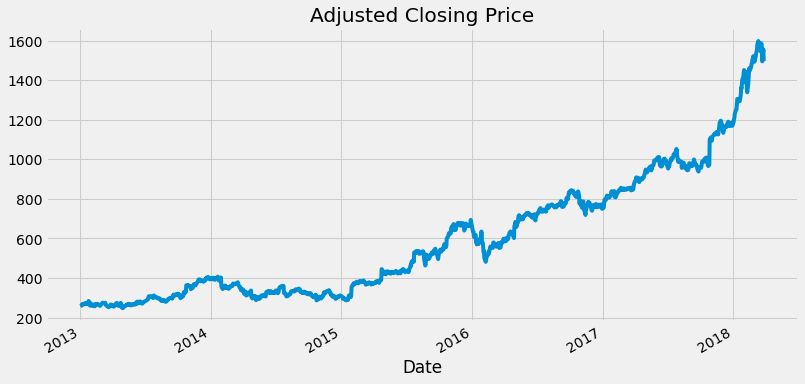

In [13]:
data['Adj_Close'].plot(figsize=(12,6),title="Adjusted Closing Price")

In [14]:
from datetime import datetime

my_year=2020
my_month=5
my_day=1
my_hour=13
my_minute=36
my_second=45

test_date=datetime(my_year,my_month,my_day)
test_date

datetime.datetime(2020, 5, 1, 0, 0)

In [15]:
data.info

<bound method DataFrame.info of                Open       High       Low      Close   Volume  Adj_Close
Date                                                                   
2018-03-27  1572.40  1575.9600  1482.320  1497.0500  6793279  1497.0500
2018-03-26  1530.00  1556.9900  1499.250  1555.8600  5547618  1555.8600
2018-03-23  1539.01  1549.0200  1495.360  1495.5600  7843966  1495.5600
2018-03-22  1565.47  1573.8500  1542.400  1544.1000  6177737  1544.1000
2018-03-21  1586.45  1590.0000  1563.170  1581.8600  4667291  1581.8600
...             ...        ...       ...        ...      ...        ...
2013-01-08   267.07   268.9800   263.567   266.3800  3010700   266.3800
2013-01-07   262.97   269.7250   262.670   268.4592  4910000   268.4592
2013-01-04   257.58   259.8000   256.650   259.1500  1874200   259.1500
2013-01-03   257.27   260.8800   256.370   258.4800  2750900   258.4800
2013-01-02   256.08   258.0999   253.260   257.3100  3271000   257.3100

[1316 rows x 6 columns]>

In [16]:
print(data.index.min())

2013-01-02 00:00:00


In [17]:
print(data.index.max())

2018-03-27 00:00:00


In [18]:
data.index.argmin()

1315

In [19]:
data.index.argmax()

0

In [20]:
y=data.resample('Y')

In [21]:
y.mean()

,Open,High,Low,Close,Volume,Adj_Close
Date,,,,,,
2013-12-31,297.877223,300.925966,294.656658,298.032235,2.967880e+06,298.032235
2014-12-31,332.798433,336.317462,328.545440,332.550976,4.083223e+06,332.550976
2015-12-31,478.126230,483.248272,472.875443,478.137321,3.797801e+06,478.137321
2016-12-31,699.669762,705.799103,692.646189,699.523135,4.122043e+06,699.523135
2017-12-31,967.565060,973.789752,959.991826,967.403996,3.466207e+06,967.403996
2018-12-31,1429.770000,1446.701017,1409.469661,1429.991186,5.586829e+06,1429.991186


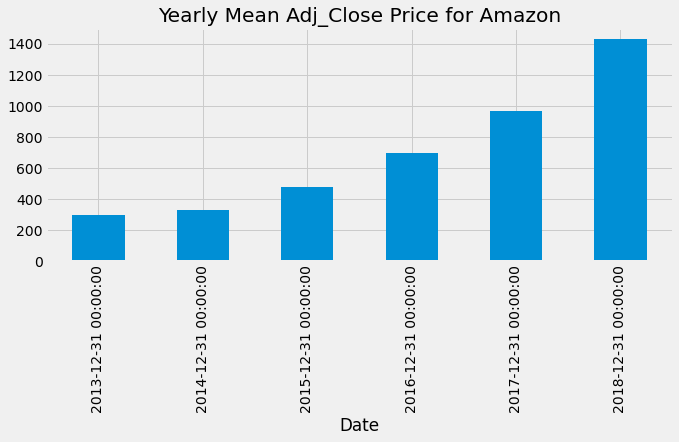

In [22]:
data["Adj_Close"].resample('A').mean().plot(kind='bar',figsize=(10,4))
plt.title("Yearly Mean Adj_Close Price for Amazon")
plt.show()

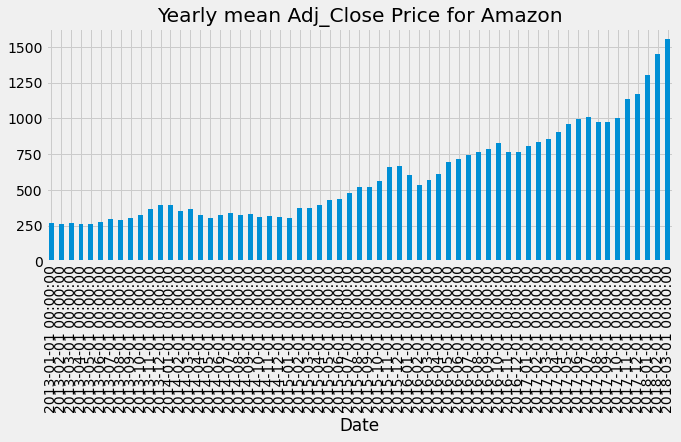

In [23]:
data["Open"].resample('MS').mean().plot(kind='bar',figsize=(10,4))
plt.title("Yearly mean Adj_Close Price for Amazon")
plt.show()

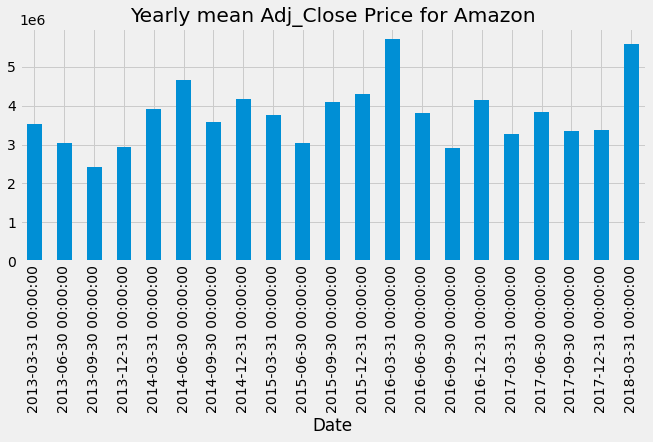

In [24]:
data["Volume"].resample('Q').mean().plot(kind='bar',figsize=(10,4))
plt.title("Yearly mean Adj_Close Price for Amazon")
plt.show()

In [25]:
data.head()

,Open,High,Low,Close,Volume,Adj_Close
Date,,,,,,
2018-03-27,1572.40,1575.96,1482.32,1497.05,6793279,1497.05
2018-03-26,1530.00,1556.99,1499.25,1555.86,5547618,1555.86
2018-03-23,1539.01,1549.02,1495.36,1495.56,7843966,1495.56
2018-03-22,1565.47,1573.85,1542.40,1544.10,6177737,1544.10
2018-03-21,1586.45,1590.00,1563.17,1581.86,4667291,1581.86


In [26]:
data.shift(periods=1).head()

,Open,High,Low,Close,Volume,Adj_Close
Date,,,,,,
2018-03-27,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-26,1572.40,1575.96,1482.32,1497.05,6793279.0,1497.05
2018-03-23,1530.00,1556.99,1499.25,1555.86,5547618.0,1555.86
2018-03-22,1539.01,1549.02,1495.36,1495.56,7843966.0,1495.56
2018-03-21,1565.47,1573.85,1542.40,1544.10,6177737.0,1544.10


In [27]:
data.shift(periods=-1).head()

,Open,High,Low,Close,Volume,Adj_Close
Date,,,,,,
2018-03-27,1530.00,1556.99,1499.25,1555.86,5547618.0,1555.86
2018-03-26,1539.01,1549.02,1495.36,1495.56,7843966.0,1495.56
2018-03-23,1565.47,1573.85,1542.40,1544.10,6177737.0,1544.10
2018-03-22,1586.45,1590.00,1563.17,1581.86,4667291.0,1581.86
2018-03-21,1550.34,1587.00,1545.41,1586.51,4507049.0,1586.51


In [28]:
data.head(10)

,Open,High,Low,Close,Volume,Adj_Close
Date,,,,,,
2018-03-27,1572.40,1575.96,1482.32,1497.05,6793279,1497.05
2018-03-26,1530.00,1556.99,1499.25,1555.86,5547618,1555.86
2018-03-23,1539.01,1549.02,1495.36,1495.56,7843966,1495.56
2018-03-22,1565.47,1573.85,1542.40,1544.10,6177737,1544.10
2018-03-21,1586.45,1590.00,1563.17,1581.86,4667291,1581.86
2018-03-20,1550.34,1587.00,1545.41,1586.51,4507049,1586.51
2018-03-19,1554.53,1561.66,1525.35,1544.93,6376619,1544.93
2018-03-16,1583.45,1589.44,1567.50,1571.68,5145054,1571.68
2018-03-15,1595.00,1596.91,1578.11,1582.32,4026744,1582.32


In [29]:
data.shift(periods=3,freq="M")

,Open,High,Low,Close,Volume,Adj_Close
Date,,,,,,
2018-05-31,1572.40,1575.9600,1482.320,1497.0500,6793279,1497.0500
2018-05-31,1530.00,1556.9900,1499.250,1555.8600,5547618,1555.8600
2018-05-31,1539.01,1549.0200,1495.360,1495.5600,7843966,1495.5600
2018-05-31,1565.47,1573.8500,1542.400,1544.1000,6177737,1544.1000
2018-05-31,1586.45,1590.0000,1563.170,1581.8600,4667291,1581.8600
...,...,...,...,...,...,...
2013-03-31,267.07,268.9800,263.567,266.3800,3010700,266.3800
2013-03-31,262.97,269.7250,262.670,268.4592,4910000,268.4592
2013-03-31,257.58,259.8000,256.650,259.1500,1874200,259.1500


C:\Users\1mscds08\AppData\Local\Temp\ipykernel_11464\2360013061.py:1: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  ROI=100*(data['Adj_Close'].tshift(periods=-365,freq='D')/data['Adj_Close']-1)


Text(0, 0.5, '%Return on Investment')

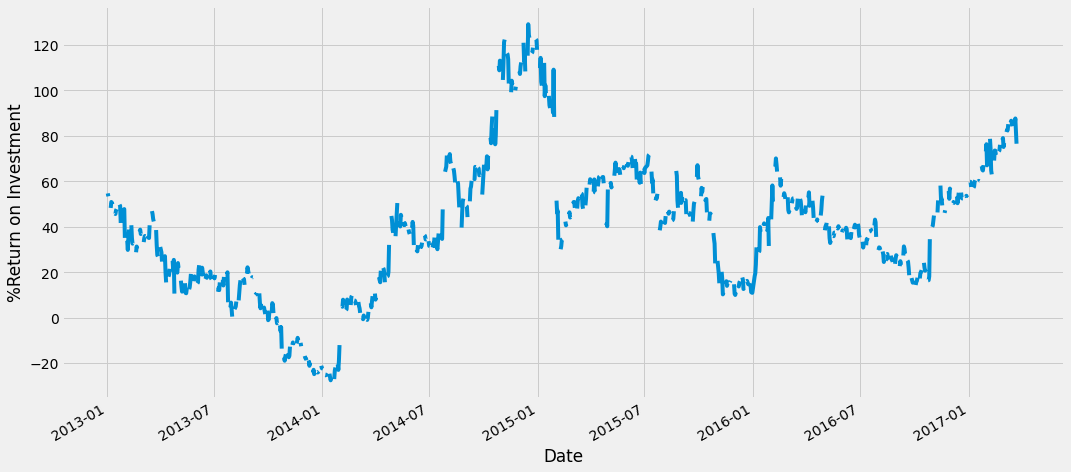

In [30]:
ROI=100*(data['Adj_Close'].tshift(periods=-365,freq='D')/data['Adj_Close']-1)
ROI.plot(figsize=(16,8))
plt.ylabel('%Return on Investment')

<AxesSubplot:xlabel='Date'>

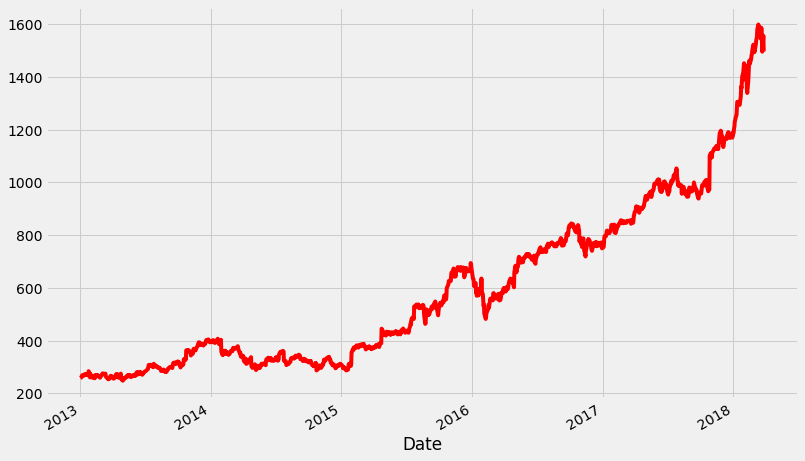

In [31]:
data['Adj_Close'].plot(figsize=(12,8),color='r')

In [32]:
data.rolling(7).mean().head(10)

,Open,High,Low,Close,Volume,Adj_Close
Date,,,,,,
2018-03-27,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-26,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-23,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-22,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-21,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-20,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-19,1556.885714,1570.640000,1521.894286,1543.695714,5.987651e+06,1543.695714
2018-03-16,1558.464286,1572.565714,1534.062857,1554.357143,5.752191e+06,1554.357143
2018-03-15,1567.750000,1578.268571,1545.328571,1558.137143,5.534923e+06,1558.137143


<AxesSubplot:xlabel='Date'>

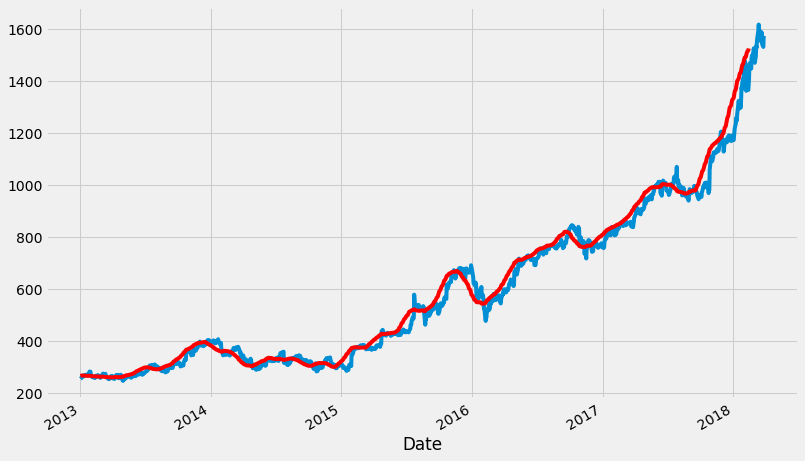

In [33]:
data["Open"].plot(figsize=(12,8))
data['Open'].rolling(30).mean().plot(figsize=(12,8),color='r')